In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it

sns.set_context('talk')

bodies = pd.read_csv('https://raw.githubusercontent.com/woodnathan/MarioKart8-Stats/master/bodies.csv')
chars = pd.read_csv('https://raw.githubusercontent.com/woodnathan/MarioKart8-Stats/master/characters.csv')
gliders = pd.read_csv('https://raw.githubusercontent.com/woodnathan/MarioKart8-Stats/master/gliders.csv')
tires = pd.read_csv('https://raw.githubusercontent.com/woodnathan/MarioKart8-Stats/master/tires.csv')

stat_cols = ['Speed','Acceleration', 'Weight', 'Handling','Traction','Mini Turbo']

chars = chars.iloc[:,[1,2,6,7,8,12,13]]
bodies = bodies.iloc[:,[1,2,6,7,8,12,13]]
tires = tires.iloc[:,[1,2,6,7,8,12,13]]

chars_unique = chars.drop_duplicates(subset=stat_cols).set_index('Character')[stat_cols]#.sort_values(by="Weight")
bodies_unique = bodies.drop_duplicates(subset=stat_cols).set_index('Body')[stat_cols]#.sort_values(by="Acceleration")
tires_unique = tires.drop_duplicates(subset=stat_cols).set_index('Body')[stat_cols]#.sort_values(by="Speed")

n_uniq_chars = len(chars_unique)
n_uniq_bodies = len(bodies_unique)
n_uniq_tires = len(tires_unique)

def check(char_name, body_type, tire_type):
    character = chars.loc[chars['Character']==char_name]
    kart = bodies.loc[bodies['Body']==body_type]
    wheels = tires.loc[tires['Body']==tire_type]
    
    stats = pd.concat([character[stat_cols], kart[stat_cols], wheels[stat_cols]]).sum()

    index = pd.MultiIndex.from_tuples([(char_name, body_type, tire_type)], names=['Character', 'Body', 'Tire'])
    
    df = pd.DataFrame(stats).transpose()
    df.index = index
    return df

config_all = it.product(chars_unique.index, bodies_unique.index, tires_unique.index)

config_base = pd.DataFrame()
for (c,b,t) in config_all:
    this_config = check(c,b,t)
    config_base = config_base.append(this_config)

def is_pareto_front(row, xlabel, ylabel):
    
    x = row[xlabel]
    y = row[ylabel]
    
    is_max_x = config_base.loc[config_base[ylabel]==y].max()[xlabel] <= x
    is_max_y = config_base.loc[config_base[xlabel]==x].max()[ylabel] <= y
    is_double = len(config_base.loc[(config_base[xlabel]>x) & (config_base[ylabel]>y)])==0
    
    return is_max_x and is_max_y and is_double

is_pareto = config_base.apply(lambda row: is_pareto_front(row, 'Speed', 'Acceleration'), axis=1)

config_pareto = config_base.loc[is_pareto].sort_values(by="Speed", ascending = False)

2.1 DataFrame whose index is combinations selected

In [3]:
config_base.head()

Speed  Acceleration  Weight  Handling  \
Character  Body          Tire                                              
Baby Mario Standard Kart Standard   2.25          3.25    2.25      4.75   
                         Monster    2.25          3.25    1.75      4.00   
                         Slick      2.75          3.00    2.50      4.75   
                         Roller     1.75          4.25    1.75      5.00   
                         Slim       2.50          3.50    2.25      5.00   

                                   Traction  Mini Turbo  
Character  Body          Tire                            
Baby Mario Standard Kart Standard      4.50        3.00  
                         Monster       5.25        3.00  
                         Slick         3.50        3.25  
                         Roller        4.25        4.50  
                         Slim          4.00        3.00

2.2 Number of Possible Combinations

In [7]:
print('Number of Possible combinations : ',len(list(it.product(chars.index, bodies.index, tires.index, gliders.index))))
print('Number of Duplicated combinations : ',len(list(it.product(chars.index, bodies.index, tires.index, gliders.index)))-len(config_base.drop_duplicates(subset=stat_cols)))
print('Unique stat combinations : ',len(config_base.drop_duplicates(subset=stat_cols)))

Number of Possible combinations :  144000
Number of Duplicated combinations :  143706
Unique stat combinations :  294


2.3 Number of Optimal Combinations

In [5]:
print('Optimal combinations : ',len(config_pareto))

Optimal combinations :  16


2.4 Pareto Efficient Frontier

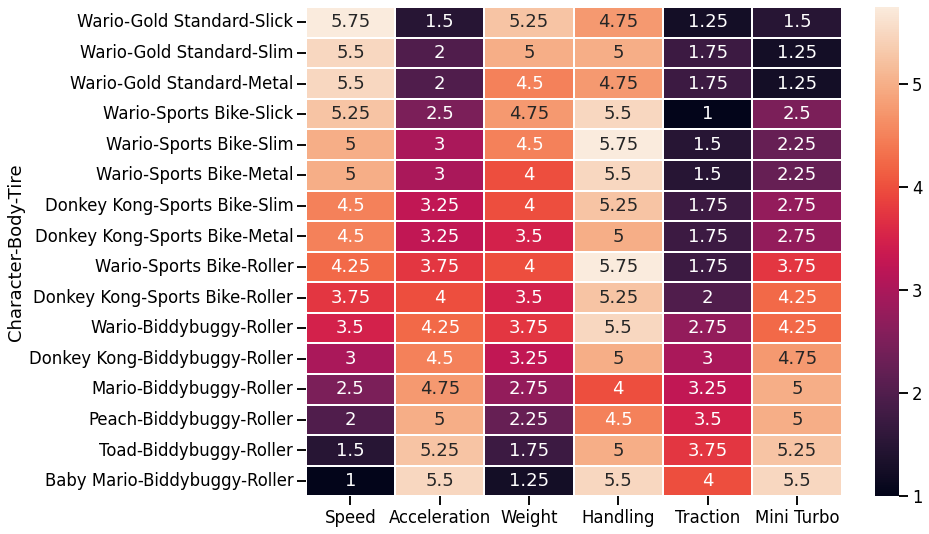

In [9]:
fig, ax = plt.subplots(1,1, figsize=(12,9))
sns.heatmap(config_pareto[stat_cols], annot=True, ax=ax, linewidth=1, fmt='.3g');

2.5 2D Graph of Preto Efficient Frontier

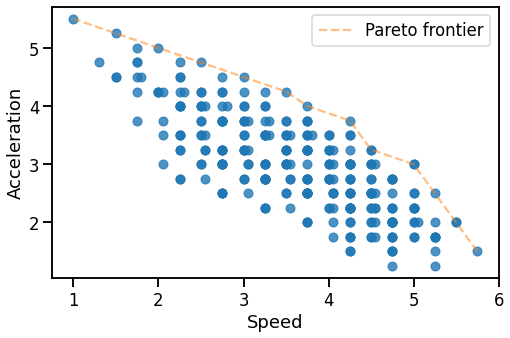

In [10]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
sns.regplot(x='Speed', y='Acceleration', data=config_base, fit_reg=False, ax=ax)

plt.plot(config_pareto['Speed'], config_pareto['Acceleration'], '--', label='Pareto frontier', alpha=0.5)

plt.xlim([0.75,6]);
plt.legend(loc='best');

That's why speed and the degree of accelerator are the most important variables in racing games, like Mario Kart.